# 1 

# AI - Friend or Foe

#### Problem Statement:

#### Aproach:

#### Dataset : AI_Slop



# 2

In [2]:
 !pip install pandas numpy matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 6.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


### Data Collection


# 3 

### Data Cleaning & Preprocessing


In [90]:
# Info and missing data summary
df.info()
print("\nMissing Values:\n", df.isna().sum().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         500 non-null    int64  
 1   post_id                    500 non-null    object 
 2   platform                   500 non-null    object 
 3   timestamp                  500 non-null    object 
 4   date                       500 non-null    object 
 5   time                       500 non-null    object 
 6   month                      500 non-null    object 
 7   weekday                    500 non-null    object 
 8   country                    500 non-null    object 
 9   city                       488 non-null    object 
 10  timezone                   500 non-null    object 
 11  author_id                  500 non-null    object 
 12  author_followers           500 non-null    int64  
 13  author_verified            500 non-null    int64  

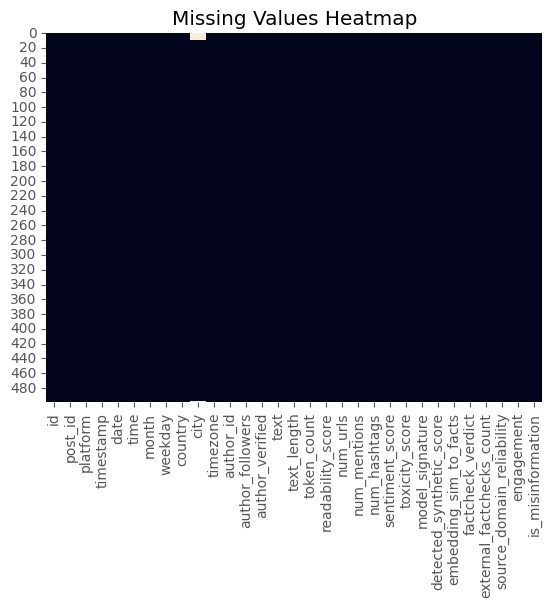

In [94]:
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [92]:
# Numeric summary
df.describe().T

# Categorical column summary
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().head(10))




Value counts for post_id:
post_id
P0008    1
P0294    1
P0042    1
P0038    1
P0484    1
P0476    1
P0433    1
P0409    1
P0403    1
P0401    1
Name: count, dtype: int64

Value counts for platform:
platform
Twitter     129
Facebook    126
Telegram    124
Reddit      121
Name: count, dtype: int64

Value counts for timestamp:
timestamp
2024-06-10 14:53:00    1
2024-11-24 11:38:00    1
2025-01-27 06:58:00    1
2024-10-11 05:37:00    1
2025-03-05 13:43:00    1
2024-09-07 01:48:00    1
2025-06-03 07:37:00    1
2025-04-09 22:01:00    1
2024-02-13 23:31:00    1
2024-09-03 04:47:00    1
Name: count, dtype: int64

Value counts for date:
date
2024-04-05    5
2025-05-18    5
2024-06-28    5
2024-06-10    4
2025-04-30    4
2024-06-23    4
2024-03-21    3
2024-11-20    3
2024-03-08    3
2025-03-22    3
Name: count, dtype: int64

Value counts for time:
time
22:49:00    4
21:56:00    3
12:28:00    3
15:01:00    3
18:08:00    3
22:15:00    3
11:10:00    3
17:25:00    3
01:48:00    3
16:47:00    2
Nam

In [88]:
# 📦 Step 1: Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Pretty settings
plt.style.use("ggplot")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 150)

# Load the dataset
df = pd.read_csv("test.csv")

# Quick overview
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


Shape: (500, 31)

Columns: ['id', 'post_id', 'platform', 'timestamp', 'date', 'time', 'month', 'weekday', 'country', 'city', 'timezone', 'author_id', 'author_followers', 'author_verified', 'text', 'text_length', 'token_count', 'readability_score', 'num_urls', 'num_mentions', 'num_hashtags', 'sentiment_score', 'toxicity_score', 'model_signature', 'detected_synthetic_score', 'embedding_sim_to_facts', 'factcheck_verdict', 'external_factchecks_count', 'source_domain_reliability', 'engagement', 'is_misinformation']


,id,post_id,platform,timestamp,date,time,month,weekday,country,city,timezone,author_id,author_followers,author_verified,text,text_length,token_count,readability_score,num_urls,num_mentions,num_hashtags,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,8,P0008,Facebook,2024-06-10 14:53:00,2024-06-10,14:53:00,June,Monday,India,NaN,IST,A5905,977067,0,Sample post content 8 about AI and misinformat...,174,58,50.52,1,2,0,-0.371,0.509,human,0.908,0.249,PARTLY,2,0.756,4616,0
1,40,P0040,Telegram,2025-03-28 01:13:00,2025-03-28,01:13:00,March,Friday,Brazil,NaN,BRT,A5719,459448,1,Sample post content 40 about AI and misinforma...,156,39,61.14,0,0,5,-0.746,0.522,unknown,0.770,0.216,PARTLY,5,0.085,2594,1
2,78,P0078,Twitter,2025-06-12 03:18:00,2025-06-12,03:18:00,June,Thursday,UK,NaN,GMT,A5469,471195,0,Sample post content 78 about AI and misinforma...,62,15,50.74,3,0,1,0.940,0.842,GPT-like,0.838,0.469,UNVERIFIED,0,0.273,6797,0
3,169,P0169,Facebook,2024-04-05 01:58:00,2024-04-05,01:58:00,April,Friday,India,NaN,IST,A7102,480778,0,Sample post content 169 about AI and misinform...,138,23,32.10,0,4,1,-0.291,0.287,unknown,0.296,0.234,FALSE,0,0.018,9697,0
4,217,P0217,Twitter,2025-05-18 10:15:00,2025-05-18,10:15:00,May,Sunday,Germany,NaN,CET,A1824,531603,0,Sample post content 217 about AI and misinform...,189,37,75.62,3,3,1,0.801,0.422,human,0.277,0.592,FALSE,3,0.211,9388,1


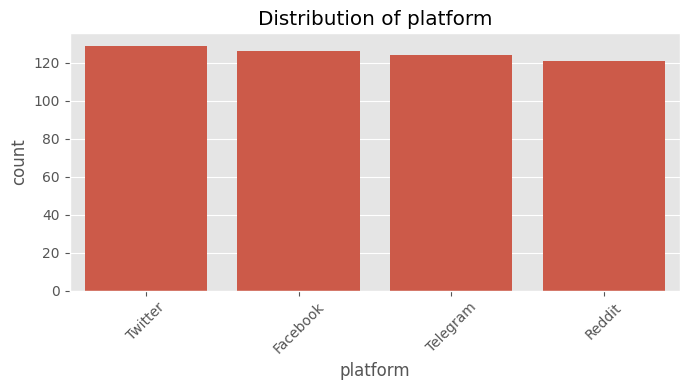

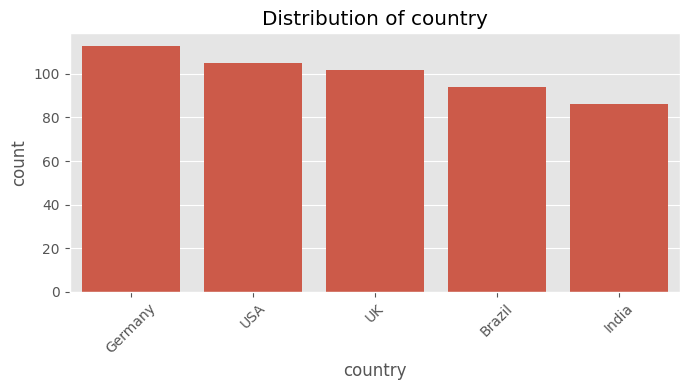

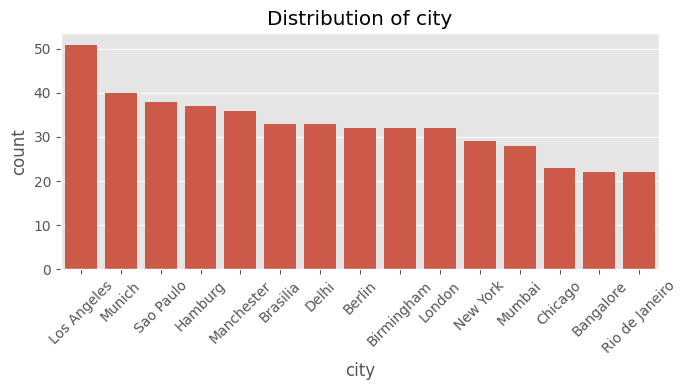

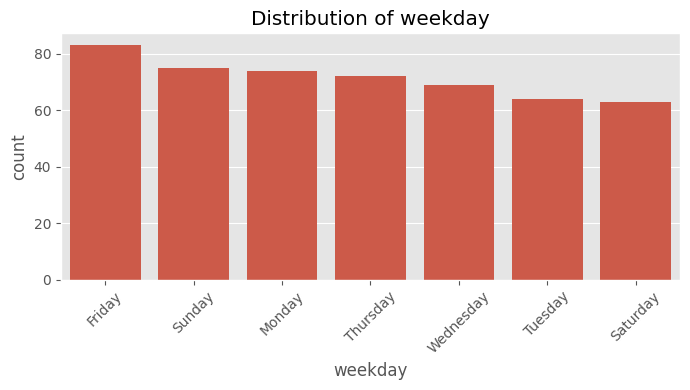

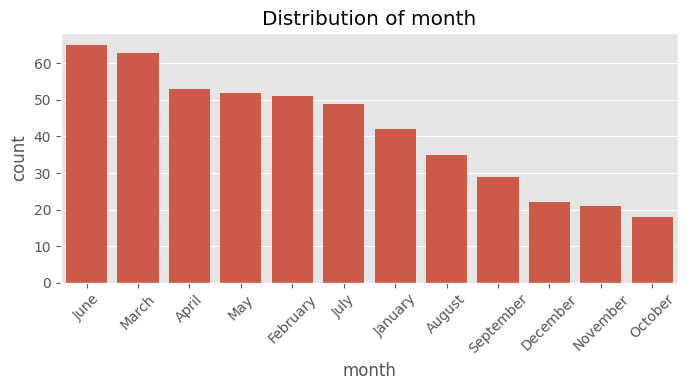

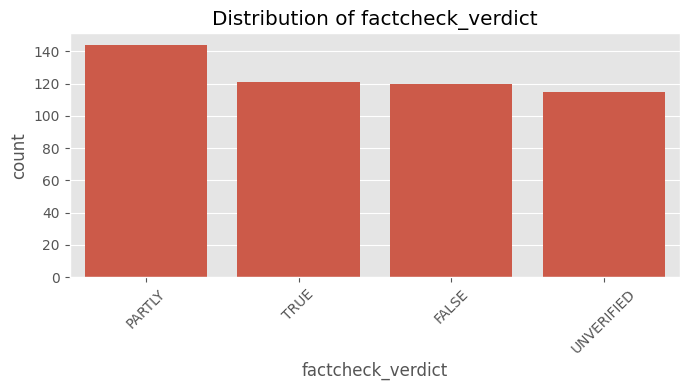

In [96]:
categorical_features = ["platform", "country", "city", "weekday", "month", "factcheck_verdict"]

for col in categorical_features:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


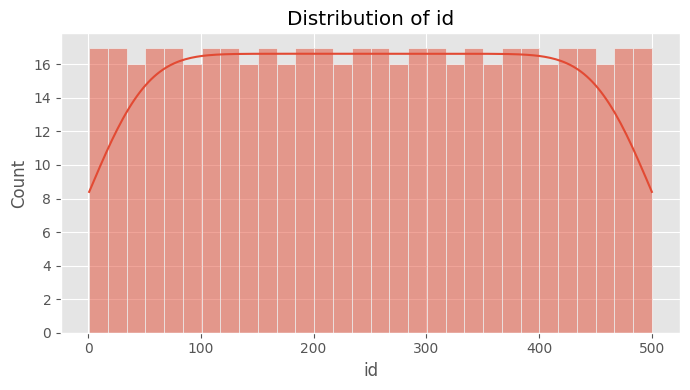

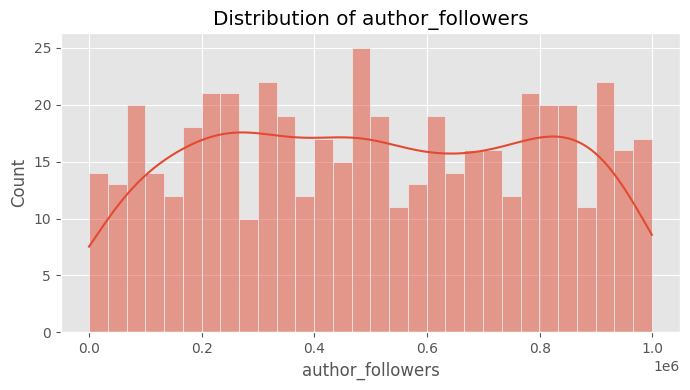

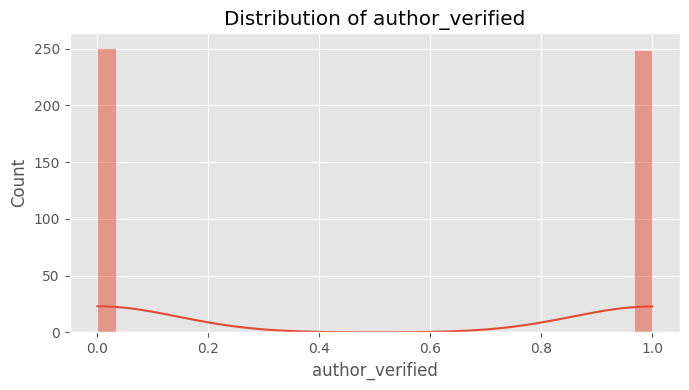

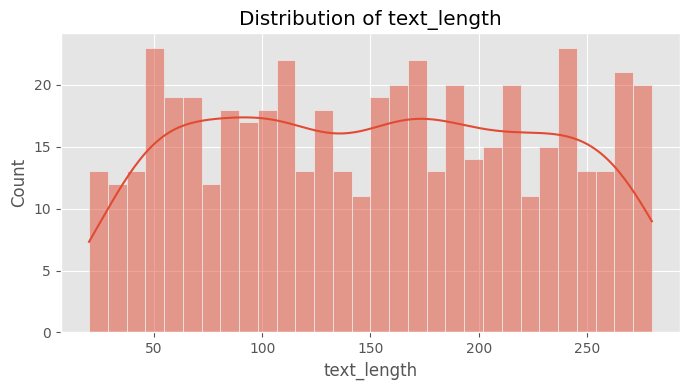

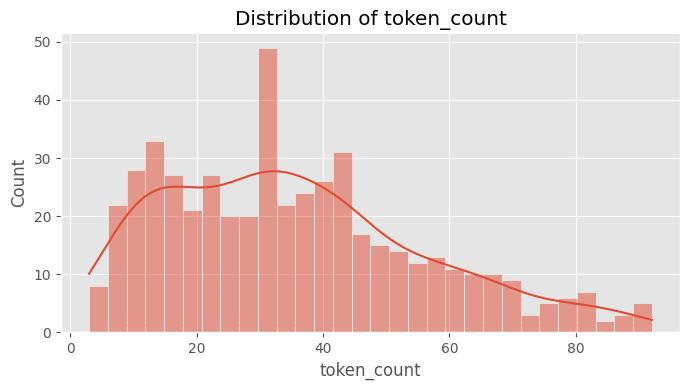

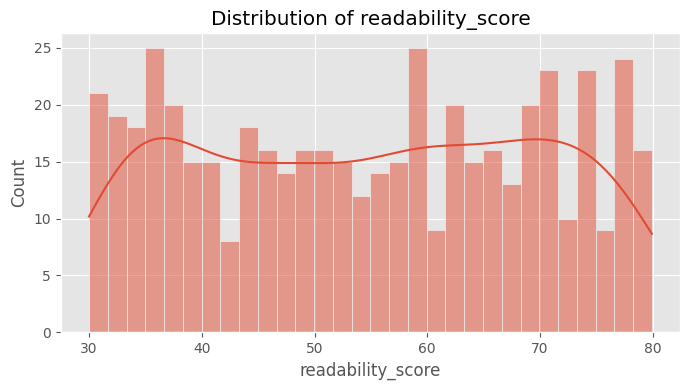

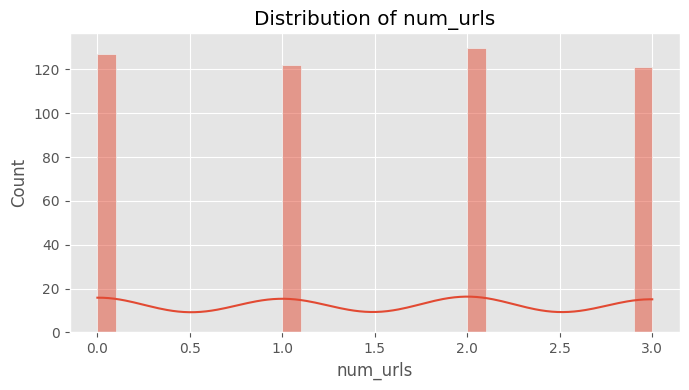

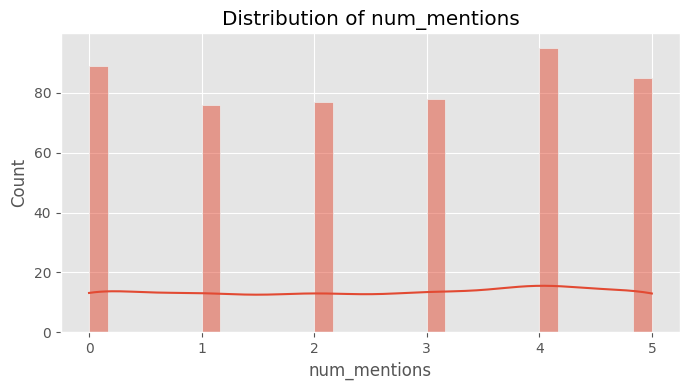

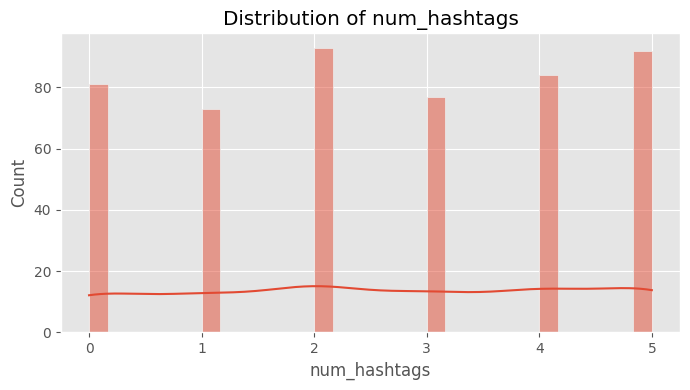

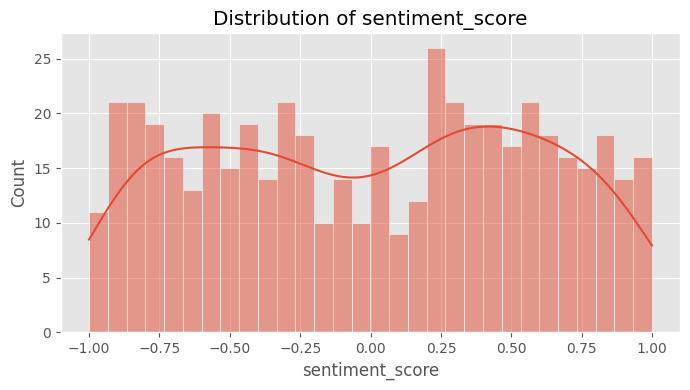

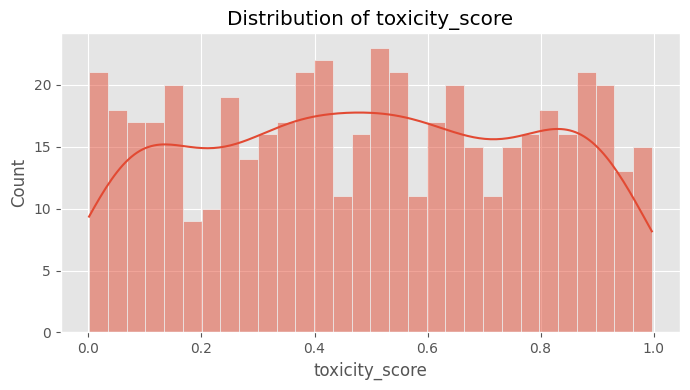

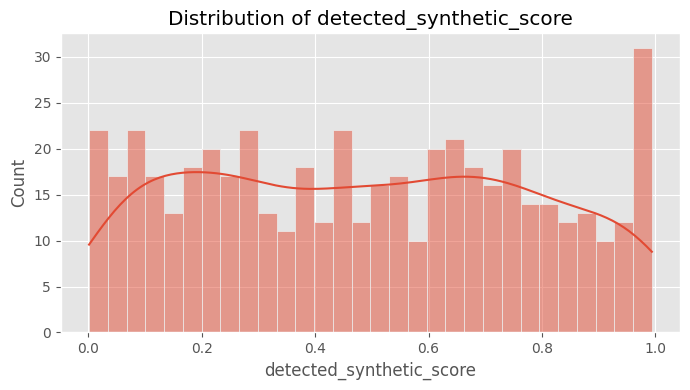

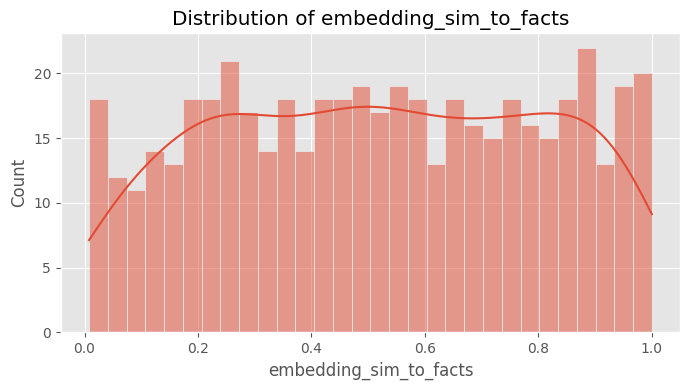

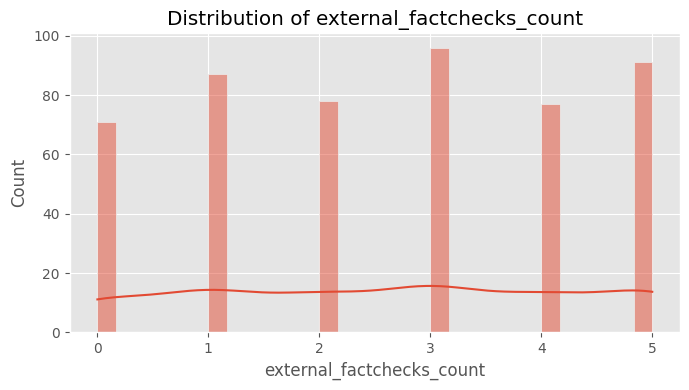

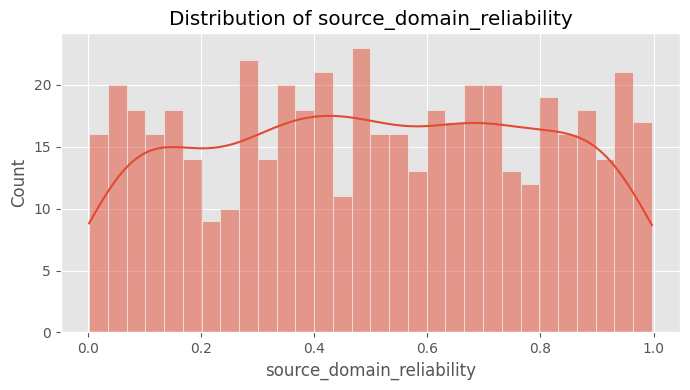

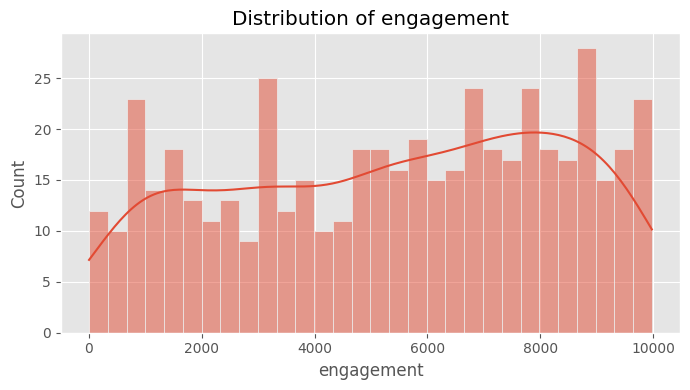

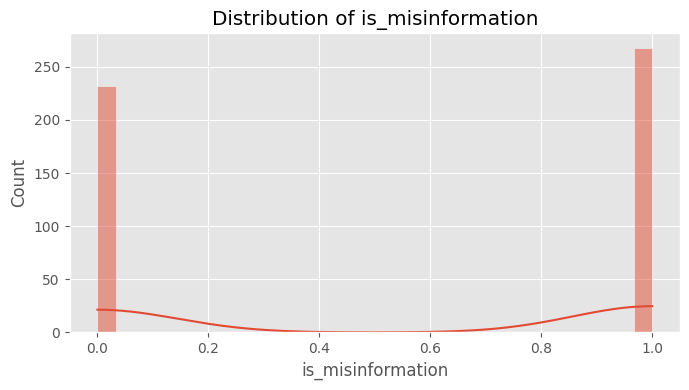

In [98]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


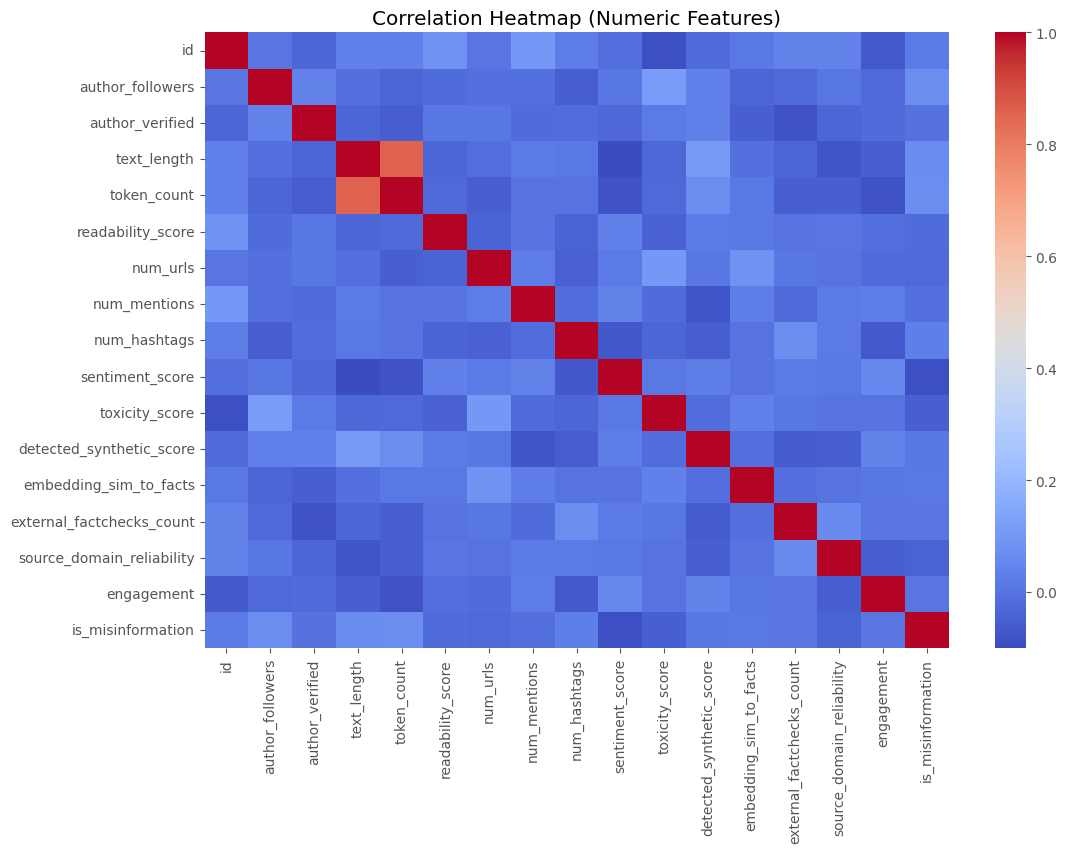

In [100]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


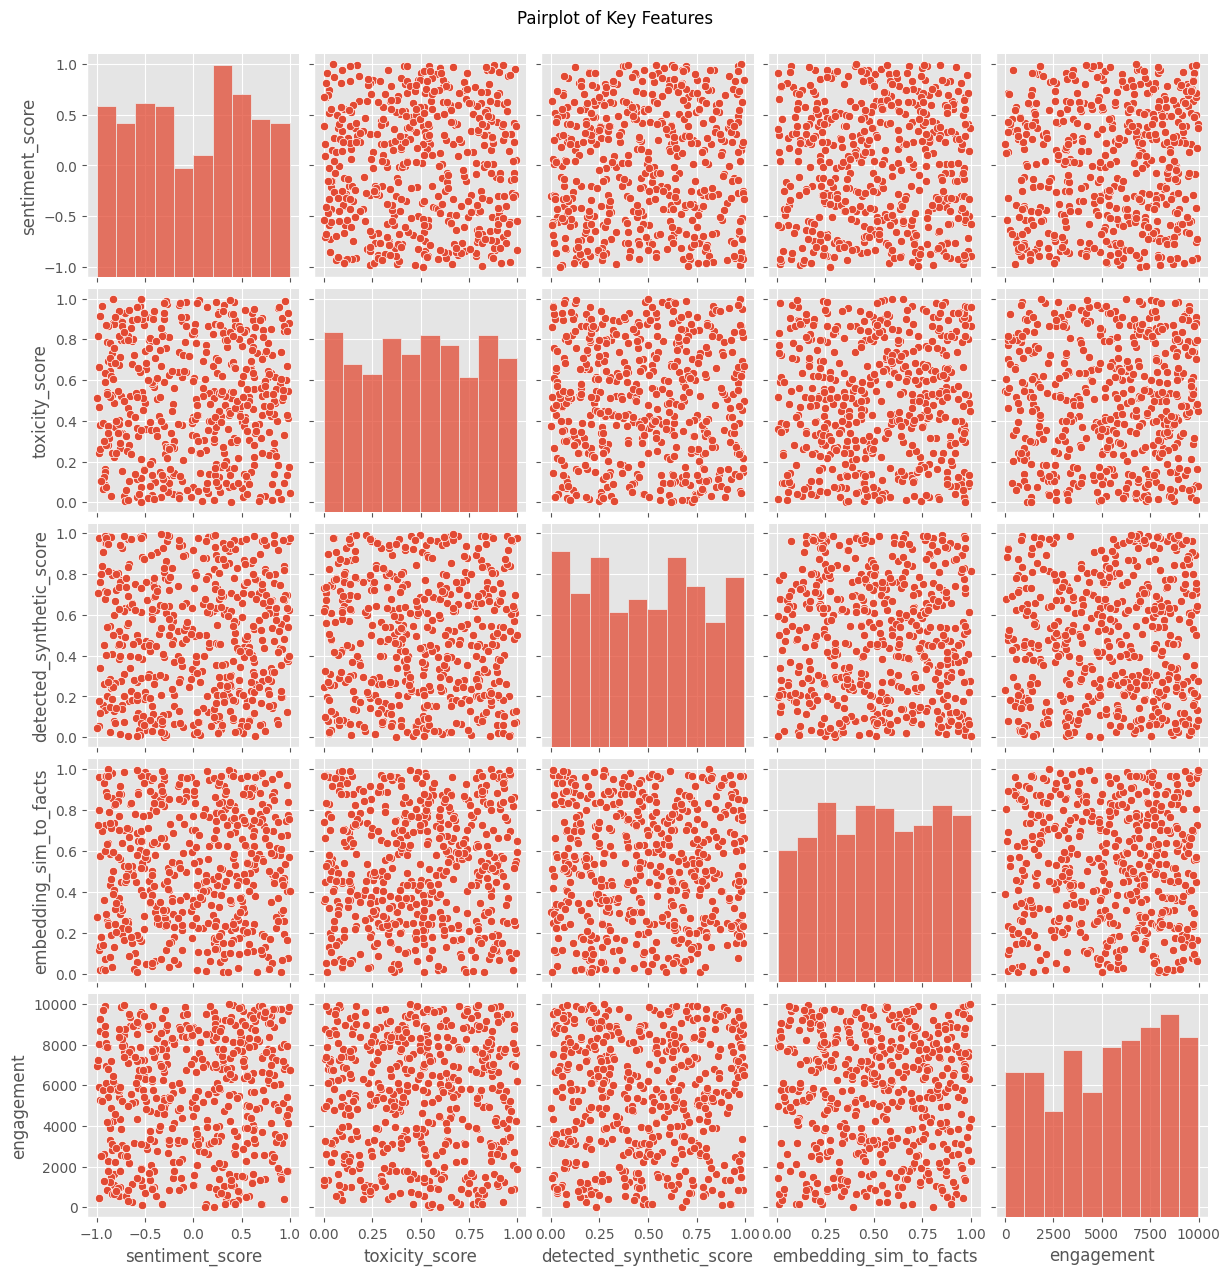

In [102]:
important_vars = ["sentiment_score", "toxicity_score", "detected_synthetic_score", "embedding_sim_to_facts", "engagement"]
subset = [col for col in important_vars if col in df.columns]

if subset:
    sns.pairplot(df[subset])
    plt.suptitle("Pairplot of Key Features", y=1.02)
    plt.show()


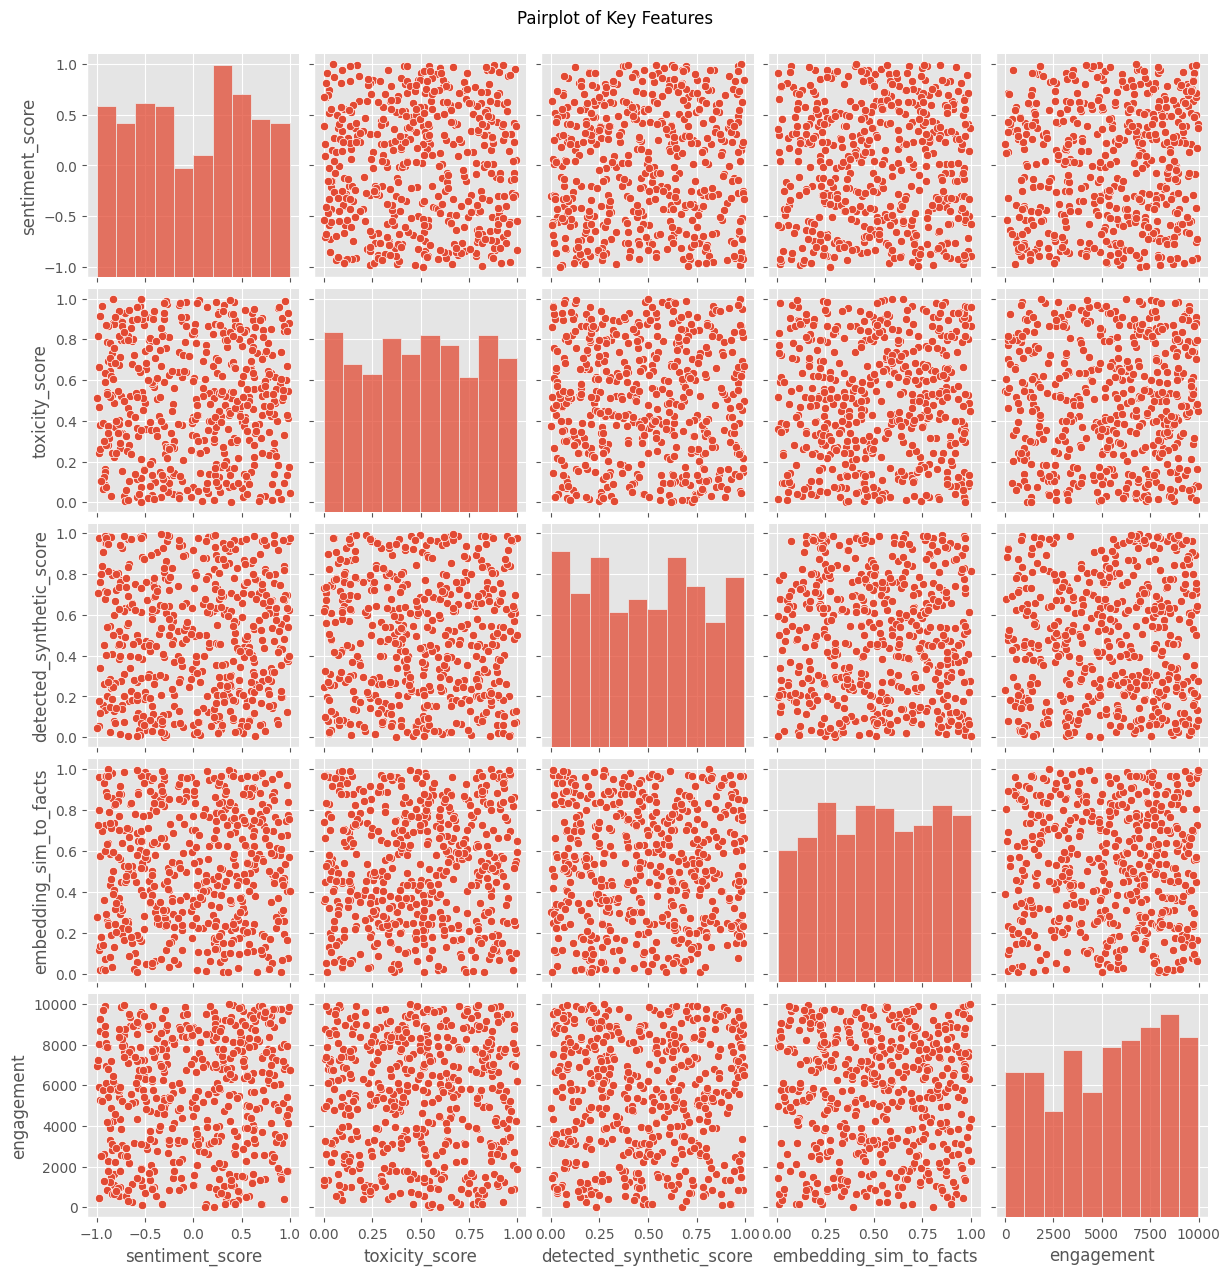

In [104]:
important_vars = ["sentiment_score", "toxicity_score", "detected_synthetic_score", "embedding_sim_to_facts", "engagement"]
subset = [col for col in important_vars if col in df.columns]

if subset:
    sns.pairplot(df[subset])
    plt.suptitle("Pairplot of Key Features", y=1.02)
    plt.show()


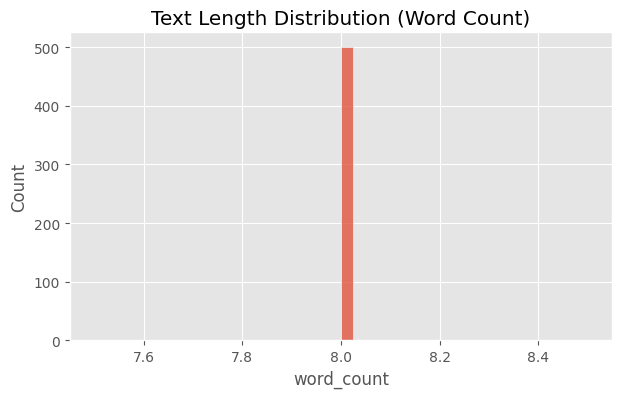

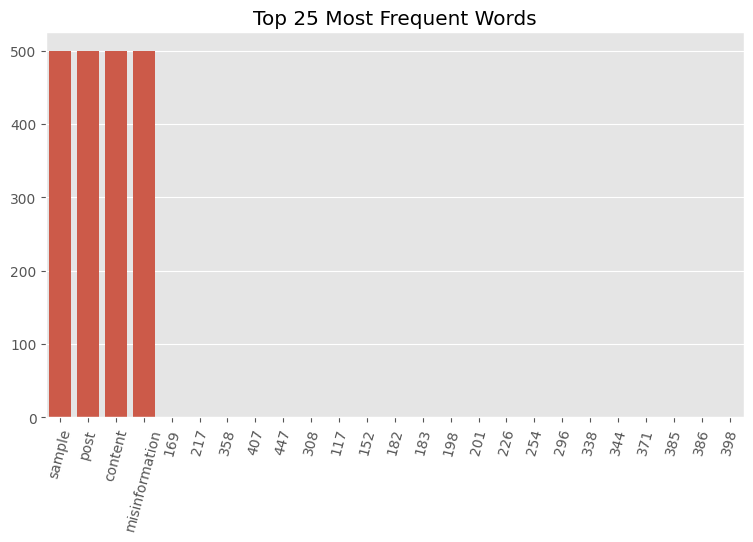

In [106]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

# Identify text column
text_col = "text"

# Add text length
df["char_count"] = df[text_col].astype(str).str.len()
df["word_count"] = df[text_col].astype(str).str.split().apply(len)

# Length distributions
plt.figure(figsize=(7,4))
sns.histplot(df["word_count"], bins=40)
plt.title("Text Length Distribution (Word Count)")
plt.show()

# Top 25 tokens
def tokenize(s):
    s = re.sub(r"[^a-zA-Z0-9\s]", "", s.lower())
    tokens = [w for w in s.split() if w not in ENGLISH_STOP_WORDS and len(w) > 2]
    return tokens

tokens = []
df[text_col].dropna().apply(lambda x: tokens.extend(tokenize(x)))
counter = Counter(tokens).most_common(25)

words, freqs = zip(*counter)
plt.figure(figsize=(9,5))
sns.barplot(x=list(words), y=list(freqs))
plt.xticks(rotation=75)
plt.title("Top 25 Most Frequent Words")
plt.show()


# 4 

### Exploratory Data Analysis (EDA)

# 5


### Feature Engineering


# 6

### Model Selection / Algorithm Design


# 7 

### Model Training & Evaluation


# 8

### Model Optimization / Tuning


# 9

### Deployment / Integration


# 10

###  Monitoring, Maintenance, and Feedback

# 11

###  Reporting & Storytelling

# 12

### Iteration and Continuous Improvement  

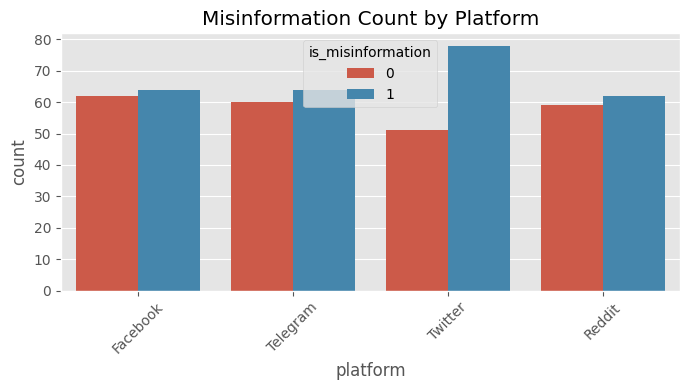

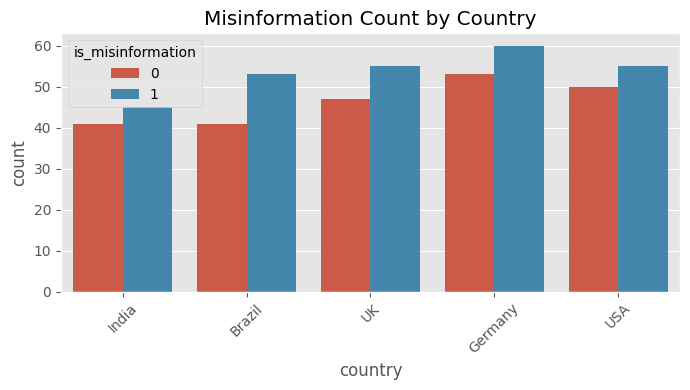

In [110]:
if "is_misinformation" in df.columns and "platform" in df.columns:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x="platform", hue="is_misinformation")
    plt.title("Misinformation Count by Platform")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if "is_misinformation" in df.columns and "country" in df.columns:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x="country", hue="is_misinformation")
    plt.title("Misinformation Count by Country")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


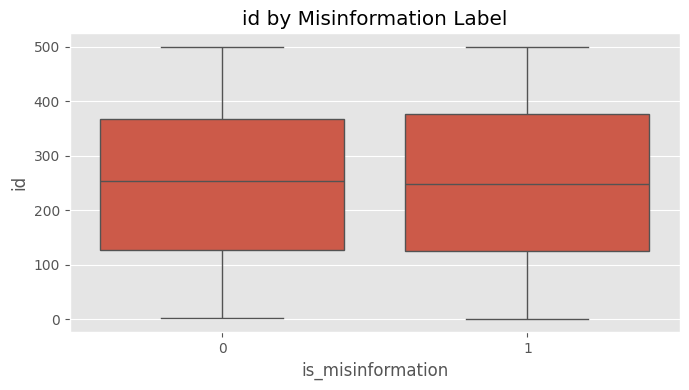

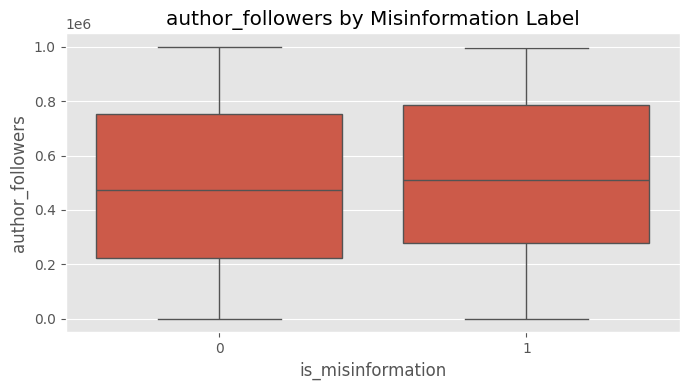

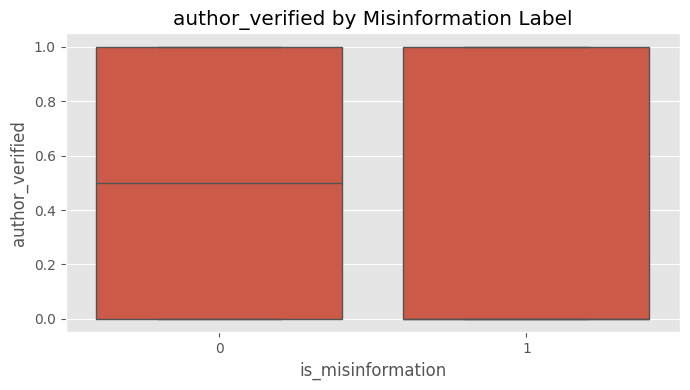

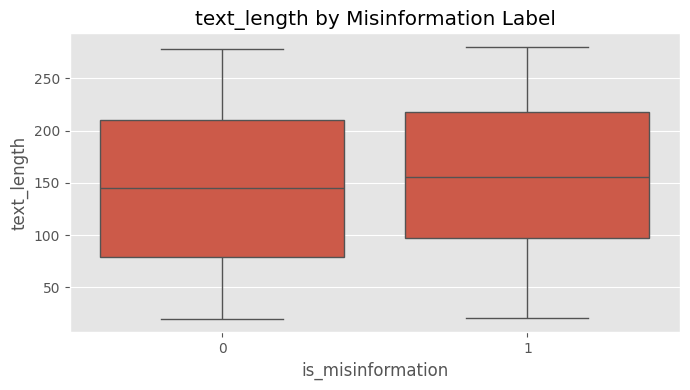

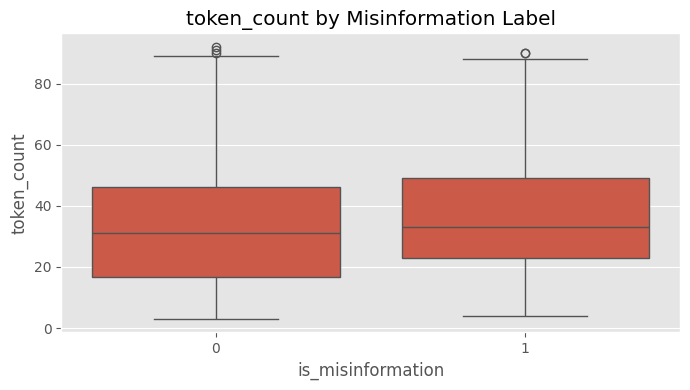

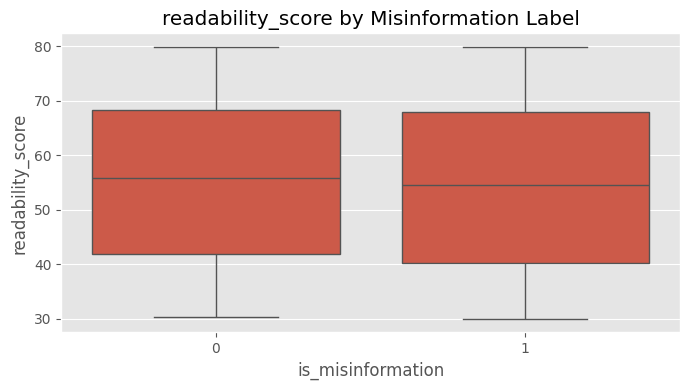

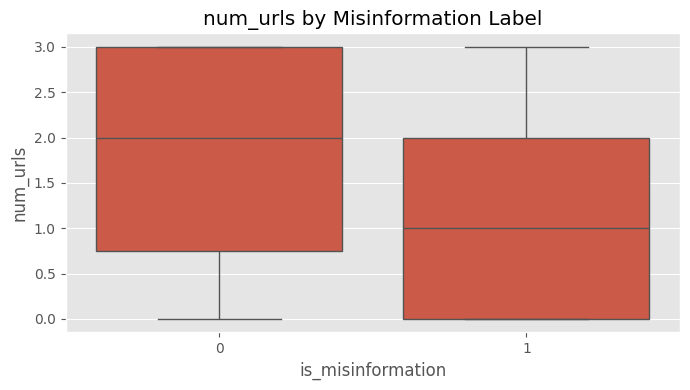

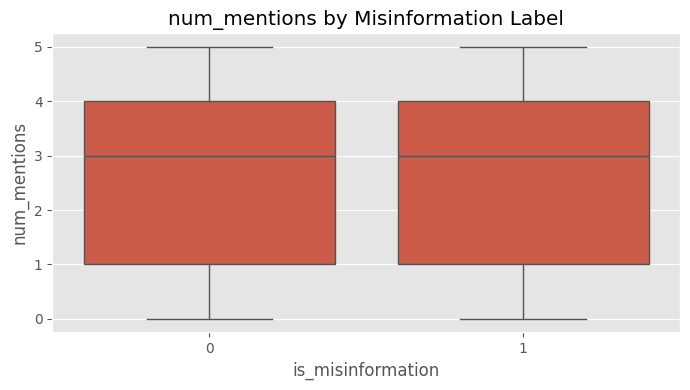

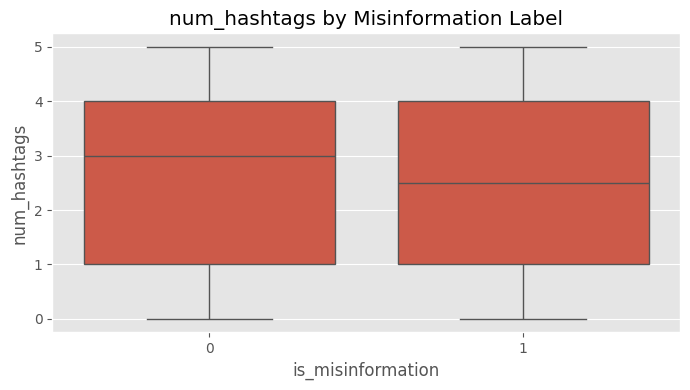

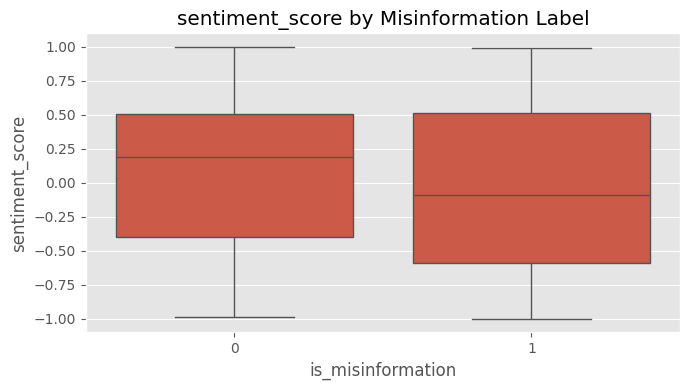

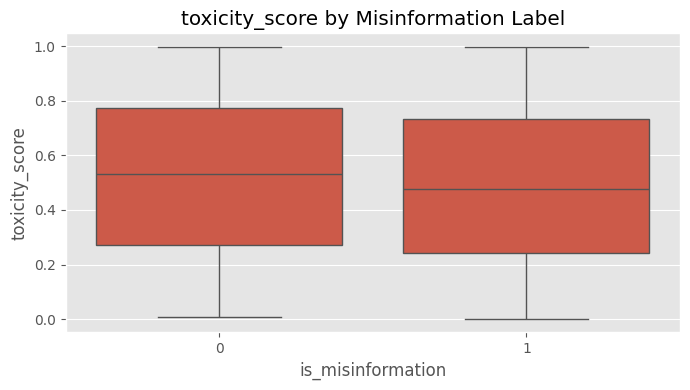

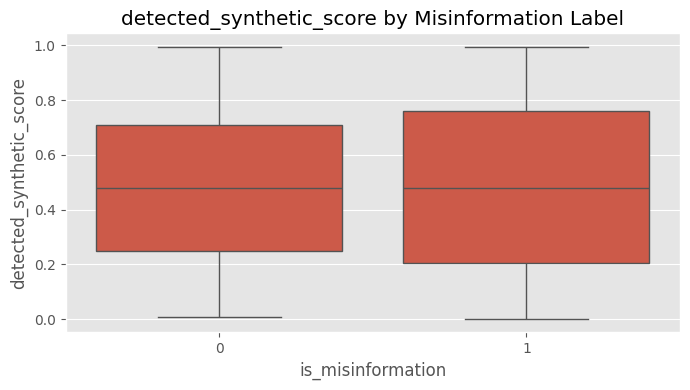

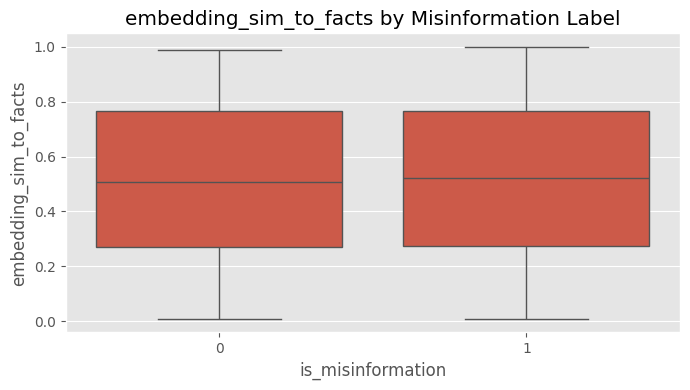

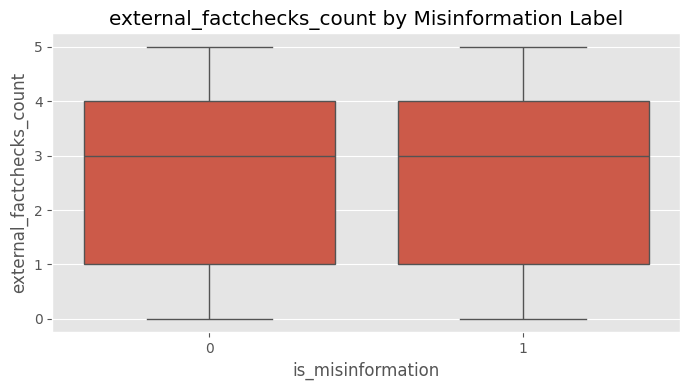

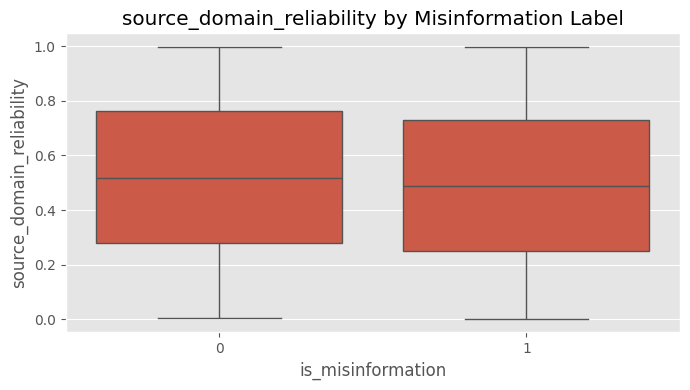

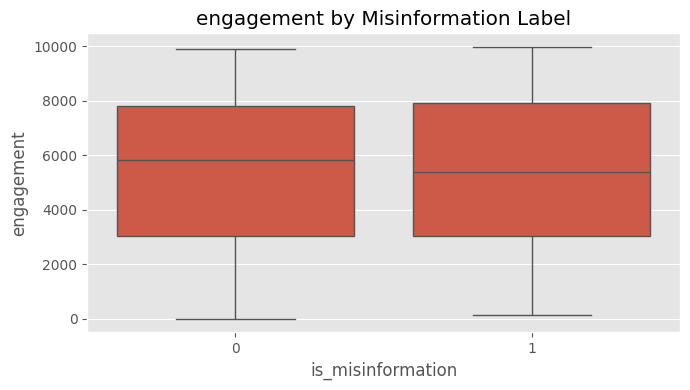

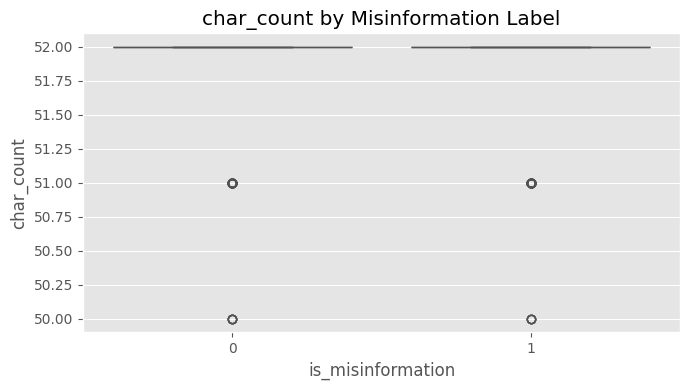

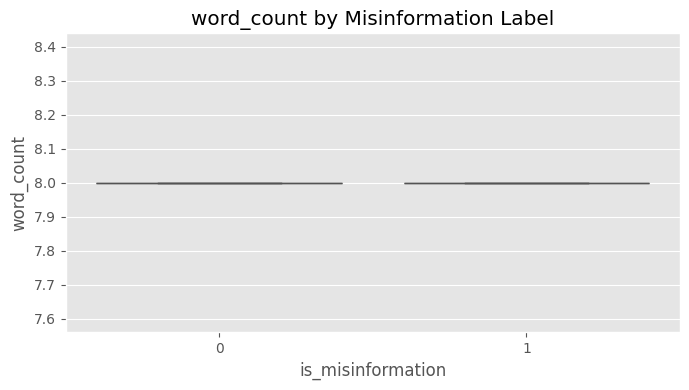

In [120]:
if "is_misinformation" in df.columns:
    numeric = df.select_dtypes(include=np.number).columns
    for col in numeric:
        if col != "is_misinformation":
            plt.figure(figsize=(7,4))
            sns.boxplot(data=df, x="is_misinformation", y=col)
            plt.title(f"{col} by Misinformation Label")
            plt.tight_layout()
            plt.show()


In [8]:
if "date" in df.columns:
    df["_date"] = pd.to_datetime(df["date"], errors="coerce")
elif "timestamp" in df.columns:
    df["_date"] = pd.to_datetime(df["timestamp"], errors="coerce")
else:
    raise ValueError("No date or timestamp column found.")

df["_ym"] = df["_date"].dt.to_period("M")

# --- sanity: ensure label is numeric 0/1 ---
label_col = "is_misinformation"
if label_col not in df.columns:
    raise ValueError("Expected a column 'is_misinformation'.")
y = df[label_col].astype(int)

# 1) monthly misinfo *rate* (and count)
monthly = (
    df.assign(y=y)
      .groupby("_ym")
      .agg(n=("id","count"), misinfo_rate=("y","mean"))
      .reset_index()
)

# plot: misinfo rate over time
plt.figure(figsize=(8,4))
plt.plot(monthly["_ym"].astype(str), monthly["misinfo_rate"], marker="o")
plt.title("Monthly misinfo rate")
plt.xlabel("month")
plt.ylabel("rate (0–1)")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

# plot: monthly post count
plt.figure(figsize=(8,4))
plt.plot(monthly["_ym"].astype(str), monthly["n"], marker="o")
plt.title("Monthly post count")
plt.xlabel("month")
plt.ylabel("count")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

# 2) misinfo rate by platform
if "platform" in df.columns:
    platform = (
        df.assign(y=y)
          .groupby("platform")
          .agg(n=("id","count"), misinfo_rate=("y","mean"))
          .sort_values("misinfo_rate", ascending=False)
          .reset_index()
    )

    plt.figure(figsize=(7,4))
    plt.bar(platform["platform"], platform["misinfo_rate"])
    plt.title("Misinfo rate by platform")
    plt.xlabel("platform")
    plt.ylabel("rate (0–1)")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

    # 3) per-platform monthly trend (small multiples)
    platforms = platform["platform"].tolist()
    for p in platforms:
        sub = df[df["platform"]==p].assign(y=y)
        m = (sub.groupby("_ym")
                 .agg(n=("id","count"), misinfo_rate=("y","mean"))
                 .reset_index())
        if m.empty: 
            continue
        plt.figure(figsize=(7,3.2))
        plt.plot(m["_ym"].astype(str), m["misinfo_rate"], marker="o")
        plt.title(f"Monthly misinfo rate — {p}")
        plt.xlabel("month"); plt.ylabel("rate (0–1)")
        plt.xticks(rotation=60, ha="right")
        plt.tight_layout()
        plt.show()

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,1,P0001,Reddit,2024-03-06 10:01:00,2024-03-06,10:01:00,March,Wednesday,USA,New York,...,-0.223,0.271,GPT-like,0.829,0.357,TRUE,4,0.543,3899,1
1,2,P0002,Reddit,2025-08-07 18:30:00,2025-08-07,18:30:00,August,Thursday,Germany,Berlin,...,-0.718,0.802,GPT-like,0.075,0.987,FALSE,3,0.199,7651,0
2,3,P0003,Telegram,2024-12-13 03:15:00,2024-12-13,03:15:00,December,Friday,USA,New York,...,-0.989,0.815,GPT-like,0.707,0.729,PARTLY,0,0.074,7260,0
3,4,P0004,Twitter,2024-04-05 07:10:00,2024-04-05,07:10:00,April,Friday,USA,Chicago,...,-0.283,0.116,human,0.863,0.623,FALSE,2,0.064,7454,1
4,5,P0005,Telegram,2024-06-07 06:18:00,2024-06-07,06:18:00,June,Friday,Germany,Hamburg,...,-0.378,0.325,GPT-like,0.730,0.638,PARTLY,0,0.472,8320,0


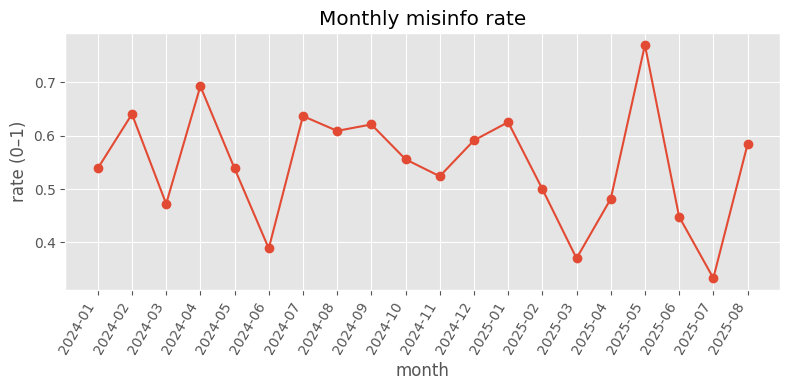

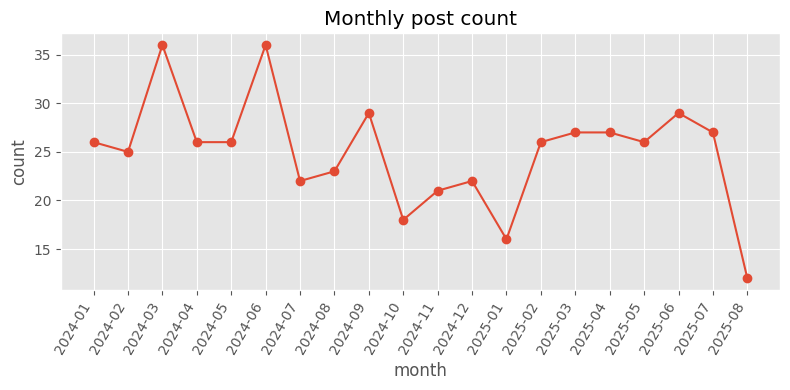

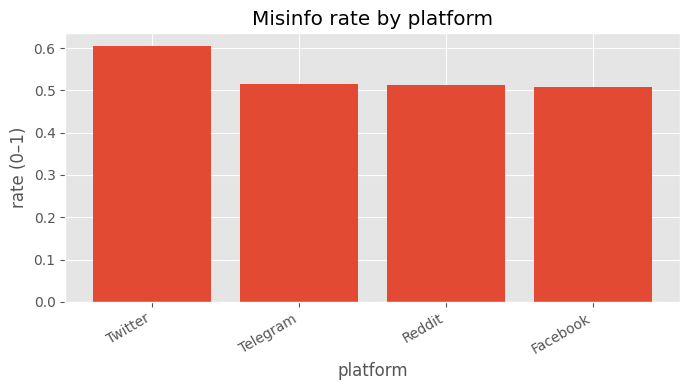

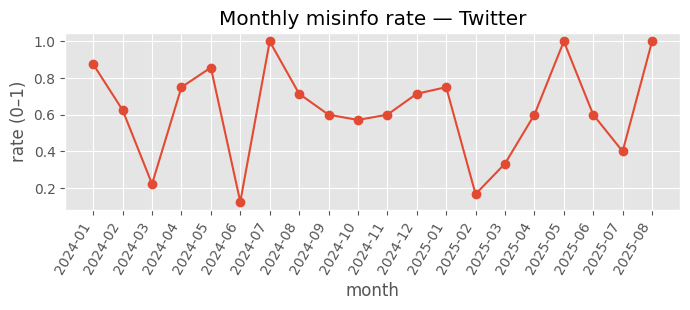

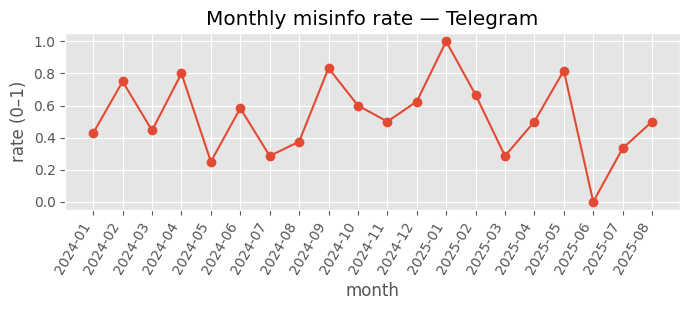

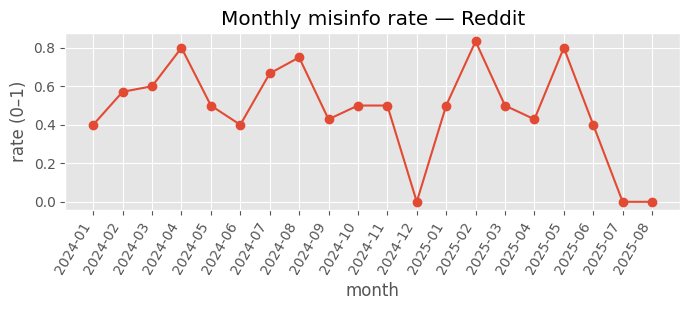

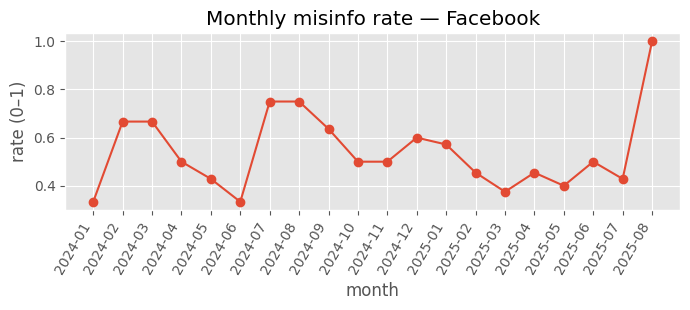

In [117]:
if "date" in df.columns:
    df["_date"] = pd.to_datetime(df["date"], errors="coerce")
elif "timestamp" in df.columns:
    df["_date"] = pd.to_datetime(df["timestamp"], errors="coerce")
else:
    raise ValueError("No date or timestamp column found.")

df["_ym"] = df["_date"].dt.to_period("M")

# --- sanity: ensure label is numeric 0/1 ---
label_col = "is_misinformation"
if label_col not in df.columns:
    raise ValueError("Expected a column 'is_misinformation'.")
y = df[label_col].astype(int)

# 1) monthly misinfo *rate* (and count)
monthly = (
    df.assign(y=y)
      .groupby("_ym")
      .agg(n=("id","count"), misinfo_rate=("y","mean"))
      .reset_index()
)

# plot: misinfo rate over time
plt.figure(figsize=(8,4))
plt.plot(monthly["_ym"].astype(str), monthly["misinfo_rate"], marker="o")
plt.title("Monthly misinfo rate")
plt.xlabel("month")
plt.ylabel("rate (0–1)")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

# plot: monthly post count
plt.figure(figsize=(8,4))
plt.plot(monthly["_ym"].astype(str), monthly["n"], marker="o")
plt.title("Monthly post count")
plt.xlabel("month")
plt.ylabel("count")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

# 2) misinfo rate by platform
if "platform" in df.columns:
    platform = (
        df.assign(y=y)
          .groupby("platform")
          .agg(n=("id","count"), misinfo_rate=("y","mean"))
          .sort_values("misinfo_rate", ascending=False)
          .reset_index()
    )

    plt.figure(figsize=(7,4))
    plt.bar(platform["platform"], platform["misinfo_rate"])
    plt.title("Misinfo rate by platform")
    plt.xlabel("platform")
    plt.ylabel("rate (0–1)")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

    # 3) per-platform monthly trend (small multiples)
    platforms = platform["platform"].tolist()
    for p in platforms:
        sub = df[df["platform"]==p].assign(y=y)
        m = (sub.groupby("_ym")
                 .agg(n=("id","count"), misinfo_rate=("y","mean"))
                 .reset_index())
        if m.empty: 
            continue
        plt.figure(figsize=(7,3.2))
        plt.plot(m["_ym"].astype(str), m["misinfo_rate"], marker="o")
        plt.title(f"Monthly misinfo rate — {p}")
        plt.xlabel("month"); plt.ylabel("rate (0–1)")
        plt.xticks(rotation=60, ha="right")
        plt.tight_layout()
        plt.show()